In [126]:
"""
Solving FrozenLake8x8 environment using Policy iteration.
Author : Moustafa Alzantot (malzantot@ucla.edu)
Citation: https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
"""
import numpy as np
import gym
from gym import wrappers
import time as time
np.random.seed(42)


def run_episode(env, policy, gamma = 1.0, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 1000):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return scores

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    #eps=0.1
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    max_iterations = 3000
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

In [116]:
gammas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]

for gamma in gammas:
    env_name  = 'FrozenLake8x8-v0'
    env = gym.make(env_name)
    optimal_policy = policy_iteration(env, gamma = gamma)
    scores = evaluate_policy(env, optimal_policy, gamma = gamma)
    print('Average scores = ', np.mean(scores))

Policy-Iteration converged at step 8.
Average scores =  1.0001000000000016e-134
Policy-Iteration converged at step 8.
Average scores =  1.0000000000000005e-74
Policy-Iteration converged at step 13.
Average scores =  1.0000010001000004e-50
Policy-Iteration converged at step 12.
Average scores =  1.0001110102110014e-30
Policy-Iteration converged at step 12.
Average scores =  1.691250748631779e-19
Policy-Iteration converged at step 6.
Average scores =  4.929682217155372e-15
Policy-Iteration converged at step 13.
Average scores =  5.000545675700211e-05
Policy-Iteration converged at step 7.
Average scores =  0.89


In [ ]:
# How many iterations does it take to converge?
# 8

# How did you choose to define convergence?
# When the new policy is equivalent to the old policy


# episilon = 1e-10, which means that there is a low chance of selecting a random action instead of the desired action
# The reward for falling into the hole ends the game

# How did the number of states affect things, if at all?
# 4x4=16 states vs 8x8=64 states
# Clock Time: 0.249 seconds, 3.564 seconds
# Policy average score: 0.72, 0.89
# Iterations to value iteration convergence: 6, 8
# Total Reward: 1.0, 1.0 

In [127]:
env_name  = 'FrozenLake8x8-v0'
env = gym.make(env_name)
start = time.time()
optimal_policy = policy_iteration(env, gamma = 1.0)
print("Average time: " + str(((time.time() - start))))
scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
print('Average scores = ', np.mean(scores))

Policy-Iteration converged at step 13.
Average time: 5.210411071777344
Average scores =  0.887


Text(0.5, 0, 'Reward')

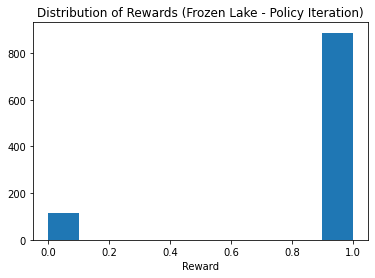

In [131]:
plt.hist(scores)
plt.title("Distribution of Rewards (Frozen Lake - Policy Iteration)")
plt.xlabel("Reward")